

**Fourier Series Python Notebook**

N. Stergioulas

Aristotle University of Thessaloniki

v1.1 (April 2020)

###### Content provided under a Creative Commons Attribution license, [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/); code under [GNU GPLv3 License](https://choosealicense.com/licenses/gpl-3.0/). (c)2020 [Nikolaos Stergioulas](http://www.astro.auth.gr/~niksterg/)


In [53]:
from __future__ import print_function, division
import sympy as sp
from sympy import symbols, fourier_series
from sympy import *
#from sympy.plotting import plot
nu, w = symbols("nu, omega", real=True)
x, t, T, p, a = symbols("x, t, T, phi, a")
m, n = symbols("m, n", integer=True)
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
init_printing()
%matplotlib inline
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['font.size'] = 18
mpl.rc('xtick', labelsize=16) ; mpl.rc('ytick', labelsize=16) 
plt.rcParams['figure.figsize']=10,7 ; plt.rcParams['legend.fontsize']=16
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
import platform
 
print(platform.python_version())

3.7.5


# Fourier Series

## Fourier's Theorem

A function $f(x)$ defined in the range $-\pi\leq x \leq \pi$ may be expanded as a series in the form
\begin{equation}
f(x) = A_0 + \sum_{n=1}^{\infty} A_n \cos nx + \sum_{n=1}^{\infty} B_n \sin nx.
\end{equation}
The theorem holds if the integral $\int |f(x)|dx$ over the whole interval is finite and $f(x)$ has only a finite number of discontinuities.

The orthogonality of the $\sin nx$ and $\cos mx$ functions, implies 
\begin{equation}
\int_{-\pi}^{\pi} \sin nx \cos mx dx = 0, \ \ \ \forall n,m
\end{equation}
\begin{equation}
\int_{-\pi}^{\pi} \cos nx \cos mx dx = \pi (\delta_{m0} \delta_{n0}+\delta_{|m||n|}),
\end{equation}
\begin{equation}
\int_{-\pi}^{\pi} \sin nx \sin mx dx = \pi \delta_{mn}, \ \ \ m>0, n>0
\end{equation}
as can be easily verified:


In [4]:
integrate(sin(n*x)*cos(m*x), (x, -pi, pi))

In [5]:
m, n = symbols("m, n", integer=True, nonnegative=True)
integrate(cos(n*x)*cos(m*x), (x, -pi, pi))

⎧2⋅π                               for (m = 0 ∧ n = 0) ∨ (m = 0 ∧ m = n ∧ n = 
⎪                                                                             
⎨ π   for (m = 0 ∧ m = -n) ∨ (m = 0 ∧ m = n) ∨ (m = -n ∧ m = n) ∨ (m = n ∧ n =
⎪                                                                             
⎩ 0                                                                           

0) ∨ (m = 0 ∧ m = -n ∧ n = 0) ∨ (m = 0 ∧ m = -n ∧ m = n ∧ n = 0)              
                                                                              
 0) ∨ (m = -n ∧ n = 0) ∨ (m = 0 ∧ m = -n ∧ m = n) ∨ (m = -n ∧ m = n ∧ n = 0) ∨
                                                                              
      otherwise                                                               

               
               
 m = -n ∨ m = n
               
               

In [6]:
m, n = symbols("m, n", integer=True, positive=True)
integrate( sin(n*x)*sin(m*x), (x, -pi, pi) )

⎧0  for m ≠ n
⎨            
⎩π  otherwise

(for the remainder, we keep $m$ and $n$ as positive).

## Fourier series expansion

Evaluating $\int_{-\pi}^{\pi} \ f(x) \cos mx\ dx$ and $\int_{-\pi}^{\pi} \ f(x) \sin mx \ dx$, it is easy to show that the expansion coefficients are:
\begin{equation}
A_0 = \frac{1}{2\pi}\int_{-\pi}^{\pi} f(x)\ dx,
\end{equation}
\begin{equation}
A_n = \frac{1}{\pi}\int_{-\pi}^{\pi} f(x) \cos nx \ dx,
\end{equation}
\begin{equation}
B_n = \frac{1}{\pi}\int_{-\pi}^{\pi} f(x) \sin nx \ dx.
\end{equation}
The Fourier series expansion of a function $f(x)$ is thus:
\begin{equation}
f(x) = \frac{1}{\pi} \left[ \frac{1}{2}\int_{-\pi}^{\pi} f(x) \ dx +  \sum_{n=1}^{\infty} \left( \int_{-\pi}^{\pi} f(x) \cos nx \ dx \right)\cos nx  + \sum_{n=1}^{\infty} \left( \int_{-\pi}^{\pi} f(x) \sin nx \ dx \right)\sin nx \right].
\end{equation}

## An example

The Fourier series expansion of the function $f(x) = x/\pi$, is, up to order $n=3$:

In [7]:
f = x/pi

1/pi * ( 1/2* integrate( f, (x, -pi, pi) ) 
        + integrate( f*cos(x), (x, -pi, pi) )*cos(x) 
        + integrate( f*cos(2*x), (x, -pi, pi) )*cos(2*x) 
        + integrate( f*cos(3*x), (x, -pi, pi) )*cos(3*x) 
        + integrate( f*sin(x), (x, -pi, pi) )*sin(x) 
        + integrate( f*sin(2*x), (x, -pi, pi) )*sin(2*x) 
        + integrate( f*sin(3*x), (x, -pi, pi) )*sin(3*x) )

The full series can be obtain using a build-in function:

In [8]:
fs = fourier_series(f, (x, -pi, pi))

The truncated series up to orders $n=3$ is

In [9]:
fs_n3 = fs.truncate(3)

display(fs_n3)

The truncated series up to order $n=9$ is

In [10]:
fs_n9 = fs.truncate(10)

display(fs_n9)

With increasing order, the series converges to the function, except near the boundaries.

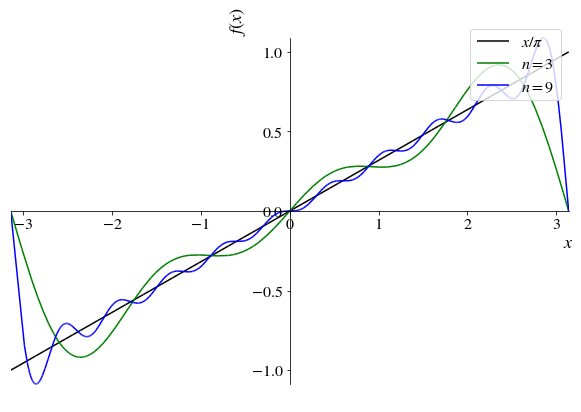

In [60]:
p1 = plot( f, fs_n3, fs_n9, (x,-pi,pi), show=False )
p1[0].line_color = 'black' ; p1[1].line_color = 'green' ; p1[2].line_color = 'blue'
p1[0].label = r'$x/\pi$' ; p1[1].label = r'$n=3$' ; p1[2].label = r'$n=9$' ; p1.legend = True 
p1.xlabel = r'$x$' ; p1.ylabel = r"$f(x)$"
p1.show()

Notice that he Fourier series is *periodic*, when extended *outside the boundaries* in which the function $f(x)$ was defined!

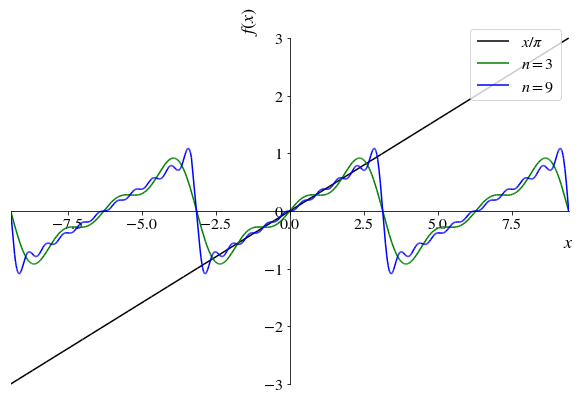

In [62]:
p1 = plot( f, fs_n3, fs_n9,(x,-3*pi,3*pi), show=False )
p1[0].line_color = 'black' ; p1[1].line_color = 'green' ; p1[2].line_color = 'blue'
p1[0].label = r'$x/\pi$' ; p1[1].label = r'$n=3$' ; p1[2].label = r'$n=9$' ; p1.legend = True 
p1.xlabel = r'$x$' ; p1.ylabel = r"$f(x)$"
p1.show()

## Periodic waveforms

If the function $f(x)$ is periodic with a period $T$, corresponding to angular frequency $\omega=2\pi/T$ and we replace $x=\omega t$, then the range $-\pi\leq x \leq \pi$ corresponds to $-T/2 \leq t \leq T/2$. From now on, we will refer to such periodic functions as $v(t)$, having a Fourier series expansion of
\begin{equation}
v(t) =  A_0 +  \sum_{n=1}^{\infty} A_n\cos n\omega t  + \sum_{n=1}^{\infty} B_n\sin n\omega t,
\end{equation}
where 
\begin{equation}
A_0 = \frac{1}{T} \int_{-T/2}^{T/2} v(t) \ dt,
\end{equation}
\begin{equation}
A_n = \frac{2}{T} \int_{-T/2}^{T/2} v(t) \cos n\omega t \ dt,
\end{equation}
\begin{equation}
B_n = \frac{2}{T} \int_{-T/2}^{T/2} v(t) \sin n\omega t \ dt, 
\end{equation}
or
\begin{equation}
v(t) = \frac{2}{T} \left[ \frac{1}{2}\int_{-T/2}^{T/2} v(t) \ dt +  \sum_{n=1}^{\infty} \left( \int_{-T/2}^{T/2} v(t) \cos n\omega t \ dt \right)\cos n\omega t  + \sum_{n=1}^{\infty} \left( \int_{-T/2}^{T/2} v(t) \sin n\omega t \ dt \right)\sin n\omega t \right].
\end{equation}
This expansion can also be written in the equivalent form:
\begin{equation}
v(t) =  A_0 +  \sum_{n=1}^{\infty} C_n\cos ( n\omega t -\phi_n),
\end{equation}
where the amplitude $C_n$ and the phase $\phi_n$ are defined as
\begin{equation}
C_n = \sqrt{A_n^2+B_n^2},
\end{equation}
\begin{equation}
\phi_n = \arctan \frac{B_n}{A_n}.
\end{equation}
Knowledge of $(A_0,C_n,\phi_n)$ is equivalent to the knowledge of $v(t)$. The lowest-frequency component $C_1\cos(\omega t-\phi_1)$ is called the fundamental, while higher-order terms are the harmonics. Some instruments, such as a wave analyzer or the human ear, only detect the magnitudes $C_n$ and cannot distinguish two waveforms that have the same magnitudes $C_n$ but different phases $\phi_n$.

## Example of a periodic signal

Consider again the function $f(x) = x/\pi$, and its periodic extension $v(t)=\omega t/\pi = (2/T)t$. The Fourier series expansion coefficients are then

In [63]:
v = (2/T)*t
A0 = (1/T)*integrate( v, (t, -T/2, T/2) )
An = (2/T)*integrate( v*sp.cos(n*w*t).subs(w,2*pi/T), (t, -T/2, T/2) )
Bn = (2/T)*integrate( v*sp.sin(n*w*t).subs(w,2*pi/T), (t, -T/2, T/2) )

Up to order $n=3$ we find

In [64]:
display(A0)

In [65]:
display( An.subs(n,1), An.subs(n,2), An.subs(n,3))

In [66]:
display( Bn.subs(n,1), Bn.subs(n,2), Bn.subs(n,3))

Notice that $A_0=0, \ A_n=0$, because $v(t)$ is odd about $t=0$. The Fourier series expansion of $v(t)=\omega t/\pi = (2/T)t$ up to $n=3$ is thus

In [67]:
A0 + Sum( An*cos(n*w*t).subs(w,2*pi/T), (n, 1, 3) ).doit() \
   + Sum( Bn*sin(n*w*t).subs(w,2*pi/T), (n, 1, 3) ).doit()

and up to $n=9$ we find

In [68]:
s9 = A0 + Sum( An*cos(n*w*t).subs(w,2*pi/T), (n, 1, 9) ).doit() \
   + Sum( Bn*sin(n*w*t).subs(w,2*pi/T), (n, 1, 9) ).doit()

display(s9)

The corresponding magnitude and phase information is

In [69]:
Cn = sp.sqrt(An*An+Bn*Bn)
pn = sp.atan2(Bn,An)

Up to $n=3$ the magnitude coefficients are

In [70]:
display( Cn.subs(n,1), Cn.subs(n,2), Cn.subs(n,3) )

and can be displayed as a stem plot

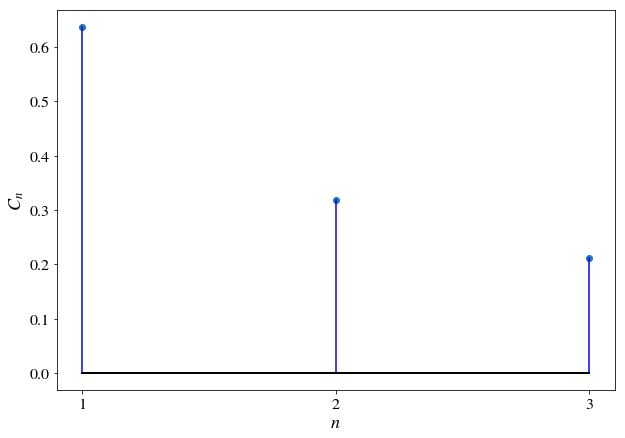

In [84]:
x = (1, 2, 3)
y = ( Cn.subs(n,1), Cn.subs(n,2), Cn.subs(n,3) )
markerline, stemlines, baseline = plt.stem( x, y, 'blue' )
plt.setp( baseline, color='black', linewidth=2 )
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel(r"$n$") ; plt.ylabel(r"$C_n$")
plt.show()

The corresponding phase coefficients are

In [81]:
display( pn.subs(n,1), pn.subs(n,2), pn.subs(n,3) )

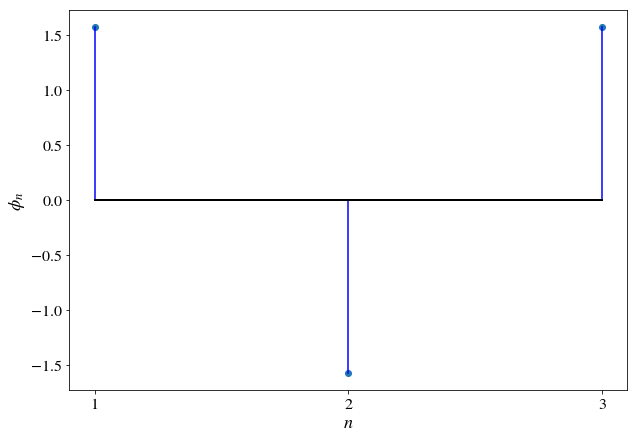

In [85]:
x = (1, 2, 3)
y = ( pn.subs(n,1), pn.subs(n,2), pn.subs(n,3) )
markerline, stemlines, baseline = plt.stem( x, y, 'blue' )
plt.setp( baseline, color='black', linewidth=2 )
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel(r"$n$")
plt.ylabel(r"$\phi_n$")
plt.show()

The same result for the Fourier series expansion is obtained using the $(C_n, \phi_n)$ coefficients as we obtained before with the $(A_n, B_n)$ coefficients

In [86]:
vs = A0 + Sum( Cn*cos(n*w*t-pn).subs(w,2*pi/T), (n, 1, 3) ).doit() 
display(vs)

Below, we plot an example of the above series, with period $T=10$.

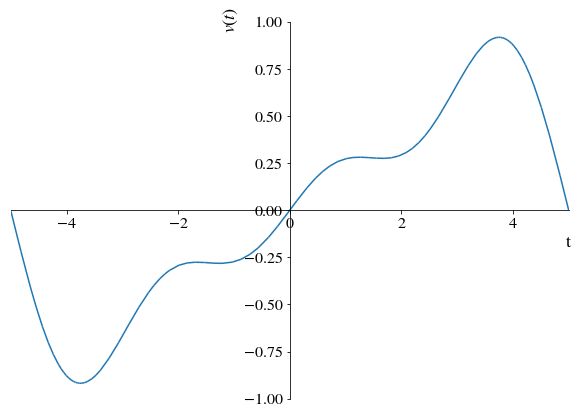

In [88]:
period =10
p2 = plot( vs.subs(T,period) , (t,-period/2,period/2), show=False )
p2.ylabel = r"$v(t)$"
p2.show()

We can now construct another series, with the same harmonic content as in the above example, but choosing other coefficients for the phases: $\phi_1 = \pi/4, \phi_2 = 3\pi/4, \phi_3 = 5\pi/4$. 

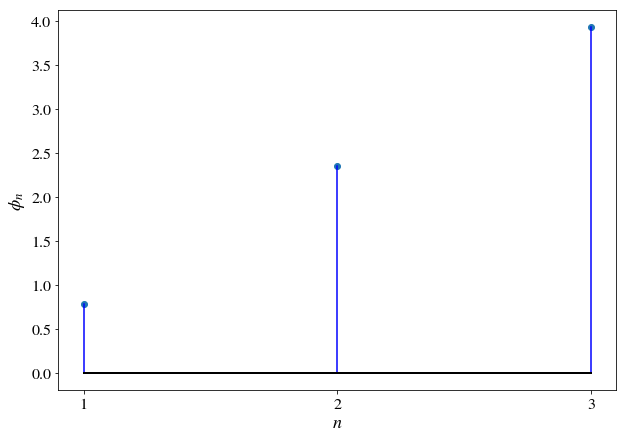

In [89]:
x = (1, 2, 3)
y = ( pi/4, 3*pi/4, 5*pi/4 )
markerline, stemlines, baseline = plt.stem( x, y, 'blue' )
plt.setp( baseline, color='black', linewidth=2 )
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel(r"$n$")
plt.ylabel(r"$\phi_n$")
plt.show()

Then, the corresponding (different) series is:

In [90]:
vs_other = A0 + Cn.subs(n,1)*cos(1*w*t-pi/4).subs(w,2*pi/T) \
              + Cn.subs(n,2)*cos(2*w*t-3*pi/4).subs(w,2*pi/T) \
              + Cn.subs(n,3)*cos(3*w*t-5*pi/4).subs(w,2*pi/T) 

display(vs_other)

A comparison of the two series, having the same amplitude coefficients, but different phase coefficients, is shown below:

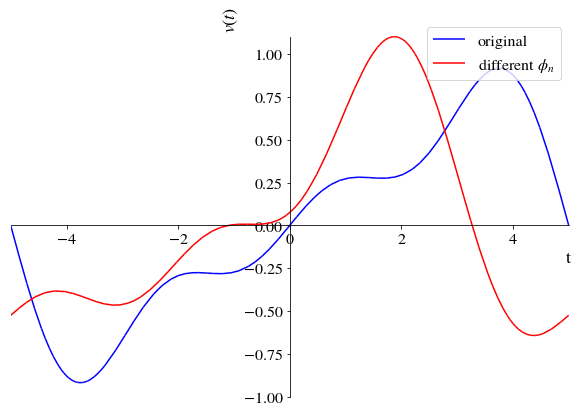

In [95]:
period =10
p3 = plot( vs.subs(T,period), vs_other.subs(T,period), (t,-period/2,period/2) , show=False )
p3[0].line_color = 'blue' ; p3[1].line_color = 'red'
p3[0].label = 'original' ; p3[1].label = 'different $\phi_n$' ; p3.legend = True 
p3.ylabel = r"$v(t)$"
p3.show()

## Example of periodic rectangular signal

Consider a periodic rectangular signal, defined as follows in the range $-T/2$ to $T/2$:

In [96]:
v_step = sp.Piecewise(
    (0, t < -T/4),
    (0, t > T/4),
    ( 1, True )
)

As a specific example, take the period to be $T=1$.

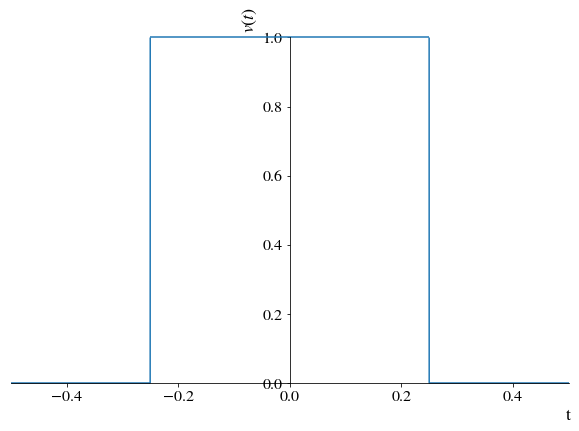

In [97]:
period = 1
v_step_plot = Piecewise( (0, t<=-1/4*period), (1, t<=1/4*period), (0, t>1/4*period) )
p4 = plot( v_step_plot, (t,-1/2*period,1/2*period), show=False)
p4.ylabel = r"$v(t)$"
p4.show()

The Fourier expansion coefficients up to $n=3$ are:

In [98]:
v = v_step.subs(T,period)
A0 = (1/T).subs(T,period)*integrate(v, (t, -period/2, period/2))
An = (2/T).subs(T,period)*integrate(v*sp.cos(n*w*t).subs(w, 2*pi/period), (t, -period/2, period/2))
Bn = (2/T).subs(T,period)*integrate(v*sp.sin(n*w*t).subs(w, 2*pi/period), (t, -period/2, period/2))
display(A0)
display(An.subs(n,1), An.subs(n,2), An.subs(n,3))
display(Bn.subs(n,1), Bn.subs(n,2), Bn.subs(n,3))

Notice that because this is an even function, the coefficients $B_n$ all vanish. The Fourier expansion at different orders is:

In [99]:
vs_step_n7 = A0 + Sum(An*cos(n*w*t).subs(w, 2*pi/period), (n, 1, 7)).doit() \
                + Sum(Bn*sin(n*w*t).subs(w, 2*pi/period), (n, 1, 7)).doit()
vs_step_n15 = A0 + Sum(An*cos(n*w*t).subs(w, 2*pi/period), (n, 1, 15)).doit() \
                 + Sum(Bn*sin(n*w*t).subs(w, 2*pi/period), (n, 1, 15)).doit()
vs_step_n31 = A0 + Sum(An*cos(n*w*t).subs(w, 2*pi/period), (n, 1, 31)).doit() \
                 + Sum(Bn*sin(n*w*t).subs(w, 2*pi/period), (n, 1, 31)).doit()

For example, up to order $n=7$:

In [100]:
display(vs_step_n7)

The following plot shows that with increasing order the series converges to the function, except at the discontinuity, where a constant error remains (Gibb's phenomenon):

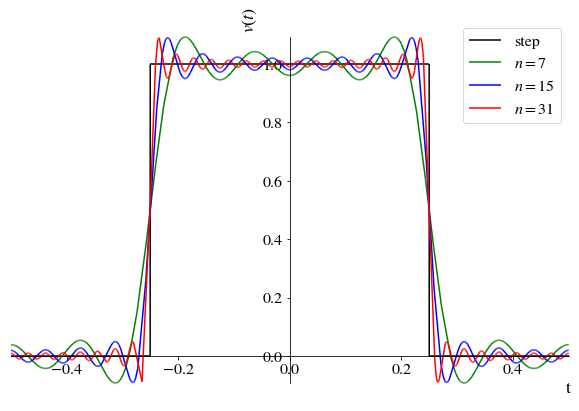

In [104]:
period =1
p5 = plot(v_step_plot, vs_step_n7, vs_step_n15, vs_step_n31, \
                     (t,-1/2*period,1/2*period), show=False)
p5[0].line_color = 'black' ; p5[1].line_color = 'green' ; p5[2].line_color = 'blue' ; p5[3].line_color = 'red'
p5[0].label = 'step' ; p5[1].label = r'$n=7$' ; p5[2].label = r'$n=15$' ; p5[3].label = r'$n=31$' ; p5.legend = True 
p1.xlabel = r'$x$' ; p1.ylabel = r"$f(x)$"
p5.ylabel = r"$v(t)$"
p5.show()

A larger interval shows the periodicity of the series:

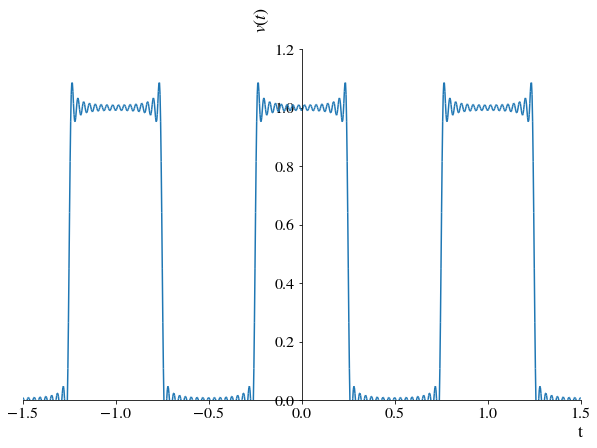

In [111]:
p6 = plot(vs_step_n31, (t,-3/2*period,3/2*period), show=False, adaptive=False,nb_of_points=1000)
p6.ylabel = r"$v(t)$"
p6.ylim = [0,1.3]
p6.show()

## Lanczos σ-approximation

The Fourier series can be adjusted by introducing $\sigma$-factors of the form ${\rm sinc}x :=\sin x/x$  . These factors manage to smooth out the Gibbs phenomena at discontinuities. Essentially, the analytic form ${\rm sinc}x$ of the Fourier transform of a step function is used to factor out the Gibbs phenomena appearing at discontinuities.

The Lanczos $\sigma$-approximation to a Fourier series is
\begin{equation}
v(t) =  A_0 +  \sum_{n=1}^{m-1} {\rm sinc}(\pi n/m) \left( A_n\cos n\omega t  +  B_n\sin n\omega t \right),
\end{equation}

We compute the $\sigma$-approximation for the step function in the previous example, using 15 terms:

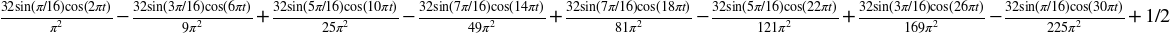

In [112]:
vs_step_Ls_n15 = A0 + Sum( (sin(pi*n/16)/(pi*n/16))*An*cos(n*w*t).subs(w, 2*pi/period), (n, 1, 15)).doit() \
                + Sum( (sin(pi*n/16)/(pi*n/16))*Bn*sin(n*w*t).subs(w, 2*pi/period), (n, 1, 15)).doit()
display(vs_step_Ls_n15)

The following plot shows that the $\sigma$-approximation (blue line) indeed manages to smooth out significantly the Gibb's phenomena at the discontinuities, that are present in the original Fourier series green line). The price to pay is a broader profile at the discontinuity.

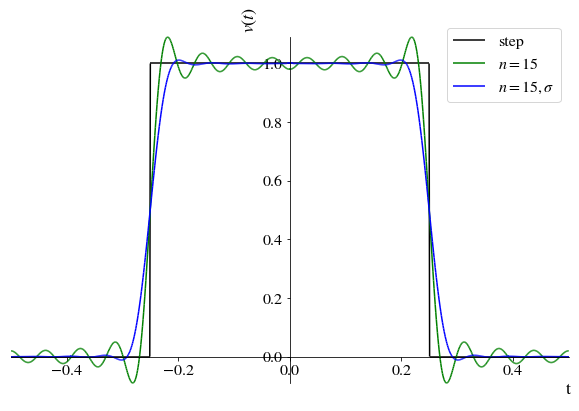

In [116]:
period =1
p7 = plot(v_step_plot, vs_step_n15, vs_step_Ls_n15, \
                     (t,-1/2*period,1/2*period), show=False, adaptive=False,nb_of_points=1000)
p7[0].line_color = 'black' ; p7[1].line_color = 'green' ; p7[2].line_color = 'blue'
p7[0].label = 'step' ; p7[1].label = r'$n=15$' ; p7[2].label = r'$n=15, \sigma $' ; p7.legend = True
p7.ylabel = r"$v(t)$"
p7.show()

## Mean Power

If a periodic voltage $v(t)$ is applied to a resistor $R$, then the average power that is dissipated in R is
\begin{equation}
P_R = \frac{1}{RT} \int_{-T/2}^{T/2} v^2(t) \ dt.
\end{equation}
If the power is in ${\rm Volt^2}$, it is customary to refer to the power dissipated in a $R=1 \Omega$ resistor, that is
\begin{equation}
P = \frac{1}{T} \int_{-T/2}^{T/2} v^2(t) \ dt,
\end{equation}
which can be viewed as the mean square value of the signal. Hence
\begin{equation}
P = \frac{1}{T} \int_{-T/2}^{T/2} \left [ A_0 +  \sum_{n=1}^{\infty} A_n\cos n\omega t  + \sum_{n=1}^{\infty} B_n\sin n\omega t \right ]^2\ dt,
\end{equation}
and because all integrals involving cross-product terms vanish, one obtains
\begin{equation}
P = A_0^2 +\frac{1}{2} \sum_{n=1}^{\infty} C_n^2.
\end{equation}
Therefore, the mean power of a periodic signal is equal to the sum of the powers of the separate Fourier components (but this is not in general true, if we add together arbitrary signals).

In the example of the periodic signal $v(t)=\omega t/\pi = (2/T)t$ that we considered above, one needs to reach $n>300$ in order to compute the power with an accuracy of better than 3 decimal places.

In [117]:
display( N( A0**2 + Sum(Cn**2, (n, 1, 3) ).doit()) )
display( N( A0**2 + Sum(Cn**2, (n, 1, 9) ).doit()) )
display( N( A0**2 + Sum(Cn**2, (n, 1, 205) ).doit()) )
display( N( A0**2 + Sum(Cn**2, (n, 1, 305) ).doit()) )
display( N( A0**2 + Sum(Cn**2, (n, 1, 405) ).doit()) )

# Complex Fourier Coefficients

One can use Euler's formula to write $\nu$:
$$ \cos(n\omega t) = \frac{1}{2}\left( e^{in\omega t} + e^{-in\omega t}\right), $$
$$ \sin(n\omega t) = -\frac{i}{2}\left( e^{in\omega t} - e^{-in\omega t}\right). $$
The Fourier series can then be expressed as
\begin{equation}
v(t) =  A_0 +  \sum_{n=1}^{\infty} \frac{A_n-iB_n}{2}e^{in\omega t}  + \sum_{n=1}^{\infty} \frac{A_n+iB_n}{2}e^{-in\omega t}.
\end{equation}
Defining the complex Fourier coefficients
$$\alpha_0=A_0,$$
$$\alpha_n = \frac{A_n-iB_n}{2},$$
$$\alpha_{-n} = \frac{A_n+iB_n}{2} = \alpha_n^*$$
the Fourier series can be written in the compact form
\begin{equation}
v(t) =  \sum_{n=-\infty}^{\infty} \alpha_n e^{in\omega t}.
\end{equation}
Notice that each combination of two complex terms gives a real term, e.g.
$$\alpha_n e^{in\omega t}+\alpha_{-n} e^{-in\omega t} = C_n\cos(\omega t-\phi_n).$$

Applying the orthogonality relation
$$\int_{-T/2}^{T/2}e^{i(n-n')\omega t} dt = \delta(n-n'),$$
the complex Fourier coefficients are obtained as
$$\alpha_n = \frac{1}{T}\int_{-T/2}^{T/2}v(t)e^{-in\omega t},$$
whereas the magnitude and phase of each term in the real series are:
$$C_n=2|\alpha_n|,$$
$$\phi_n = -\arg \alpha_n.$$
The mean power is
$$P = \sum_{n=-\infty}^{\infty}|\alpha_n|^2,$$
which is one form of Parseval's theorem.